# What are the most demanded skills for the top 3 most popular data roles?

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning Data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Mihai\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_RO = df[df['job_country'] == 'Romania']

In [8]:
df_skills = df_RO.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
7,Data Engineer,sql
7,Data Engineer,nosql
7,Data Engineer,gcp
7,Data Engineer,azure
7,Data Engineer,aws
...,...,...
780593,Senior Data Engineer with Scala,terraform
782659,"Analyst, Product Data",None
783357,Econometrician/Data Scientist,python
783357,Econometrician/Data Scientist,r


In [13]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size().sort_values(ascending=False).reset_index(name='skill_count')
df_skills_count

,job_skills,job_title_short,skill_count
0,sql,Data Engineer,624
1,python,Data Engineer,573
2,excel,Data Analyst,400
3,sql,Data Analyst,374
4,azure,Data Engineer,354
...,...,...,...
1058,jquery,Cloud Engineer,1
1059,splunk,Data Scientist,1
1060,jira,Senior Data Analyst,1
1061,splunk,Senior Data Scientist,1


In [26]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

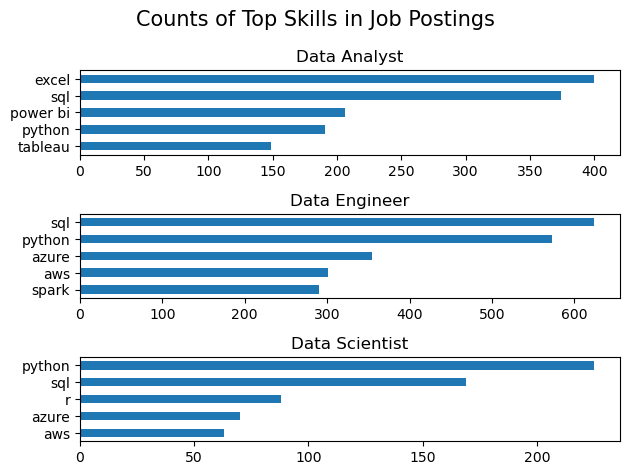

In [36]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
    ax[i].legend().set_visible(False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')

fig.suptitle('Counts of Top Skills in Job Postings',fontsize=15)
fig.tight_layout()
plt.show()

### Transform counts into % :

In [38]:
df_job_title_count = df_RO['job_title_short'].value_counts().reset_index(name = 'jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,1021
1,Data Analyst,907
2,Data Scientist,389
3,Business Analyst,368
4,Software Engineer,359
5,Senior Data Engineer,272
6,Cloud Engineer,115
7,Senior Data Analyst,110
8,Senior Data Scientist,94
9,Machine Learning Engineer,91


In [46]:
df_skills_percent = pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')
df_skills_percent['skill_percent'] = (df_skills_percent['skill_count'] / df_skills_percent['jobs_total'])*100
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,624,1021,61.116552
1,python,Data Engineer,573,1021,56.121450
2,excel,Data Analyst,400,907,44.101433
3,sql,Data Analyst,374,907,41.234840
4,azure,Data Engineer,354,1021,34.671890
...,...,...,...,...,...
1058,jquery,Cloud Engineer,1,115,0.869565
1059,splunk,Data Scientist,1,389,0.257069
1060,jira,Senior Data Analyst,1,110,0.909091
1061,splunk,Senior Data Scientist,1,94,1.063830


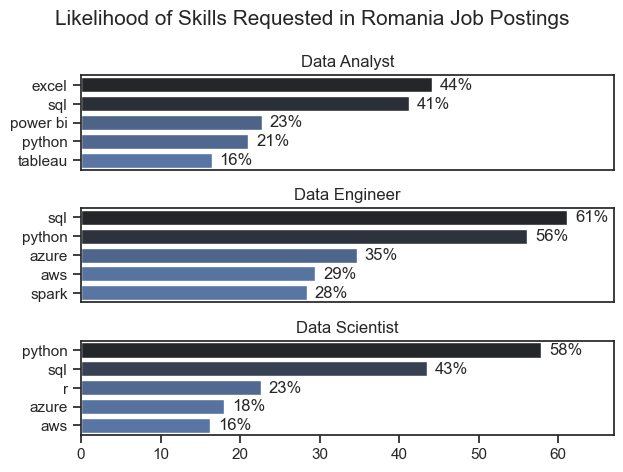

In [68]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short']==job_title].head(5)
    #df_plot.plot(kind='barh',x='job_skills',y='skill_percent',ax=ax[i],title=job_title)
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_percent',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].legend().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,67)

    for n, value in enumerate(df_plot['skill_percent']):
        ax[i].text(value + 1,n,f'{value:.0f}%',va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in Romania Job Postings',fontsize=15)
fig.tight_layout()
plt.show()